## Astronomy 534 "Extragalactic Universe" (Winter 2025)

## Project 2

#### proposal due: Friday March 28

#### project due: Friday April 18

Please upload your project to Canvas as Jupyter Notebook (`.pynb` format). It should contain all your code and plots. You can also attach other supporting files if needed: `.png` will embed with the notebook, `.pdf` will not.

# Investigating the Halo and Stellar Mass Functions with TNG

The TNG simulation is one of the most popular cosmological simulations used by astronomers, and it can be used to verify the accuracy of galaxy formation hypotheses ([Nelson et al. 2018](https://arxiv.org/abs/1812.05609)). In this project, I investigate the TNG simulation using all three of the provided box sizes, and compare the derived mass function of dark matter halos to the expectation from Press-Schechter formalism [Press & Schechter 1974](https://ui.adsabs.harvard.edu/abs/1974ApJ...187..425P/abstract). I will also compare stellar data from the TNG simulation to the stellar mass function from [Bell et al. 2003](https://ui.adsabs.harvard.edu/abs/2003ApJS..149..289B/abstract). 

The Press-Schechter formalism asserts that the fraction of halos with mass greater than M is the same as the probability of an overdensity being greater than the critical overdensity, $\sim 1.69$.

$$ F(>M) = \mathcal{P}(\delta > \delta_c) = \frac{1}{\sqrt{2\pi}}\int_{\delta_c}^\infty \frac{\delta^2}{2\sigma^2(M)}d\delta $$

The number density of dark matter halos is then found by differentiating $F(>M)$ with respect to $M$ and multiplying by the average number density $\bar{\rho}/M$, where $\bar{\rho}$ is the average matter density of the universe:

$$ \frac{dn}{dM} = -\sqrt{2\over \pi} \, {\bar{\rho} \over M^2} \,
       {\delta_c \over \sigma(M)} \, \frac{d\ln{\sigma(M)}}{d\ln{M}} \,
       \exp{\left[-{\delta_c^2 \over 2\sigma^2(M)}\right]} $$

[Bell et al. 2003](https://ui.adsabs.harvard.edu/abs/2003ApJS..149..289B/abstract) gives a form for the stellar mass function, given by the following equation, where $\phi_0 = 4\times 10^{-3}$ Mpc $^{-3}$, $\alpha = 1.1$, $M_0 = 7\times 10^{10}\, M_\odot$:

$$
    {dn \over dM_s} dM_s = \phi_0 \left({M_s \over M_0}\right)^{-\alpha}
        e^{-M_s/M_0} \; {dM_s \over M_0},
$$

We will be using the Press-Schechter formalism to compare the TNG halo masses, and the [Bell et al. 2003](https://ui.adsabs.harvard.edu/abs/2003ApJS..149..289B/abstract) function to compare the stellar masses.

# TNG Halo Mass Function

For the project, I'm going to fit the mass function to subhalo data from TNG. I'll use each of the TNG box sizes to determine the mass range that each one is valid in. I can then compare this to the numerical integration method we used in Homework 4 and see how they compare.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import illustris_python as il
plt.style.use('../mplstyle.txt')
import sys

I downloaded data from TNG50-1, TNG100-1, and TNG300-1, and I started by plotting the halo mass function from each.

In [2]:
basePath = '../data/TNG50-1'
fields = ['SubhaloMass', 'SubhaloMassType']
subhalos = il.groupcat.loadSubhalos(basePath, 99, fields=fields)
mh_50 = subhalos['SubhaloMass'] * 1e10   # in Msun/h
ms_50 = subhalos['SubhaloMassType'][:, 4] * 1e10   # in Msun/h

basePath = '../data/TNG100-1'
fields = ['SubhaloMass', 'SubhaloMassType']
subhalos = il.groupcat.loadSubhalos(basePath, 99, fields=fields)
mh_100 = subhalos['SubhaloMass'] * 1e10   # in Msun/h
ms_100 = subhalos['SubhaloMassType'][:, 4] * 1e10   # in Msun/h

basePath = '../data/TNG300-1'
fields = ['SubhaloMass', 'SubhaloMassType']
subhalos = il.groupcat.loadSubhalos(basePath, 99, fields=fields)
mh_300 = subhalos['SubhaloMass'] * 1e10   # in Msun/h
ms_300 = subhalos['SubhaloMassType'][:, 4] * 1e10   # in Msun/h

To plot the halo mass function, I am reusing the code provided in illustris.ipynb. I found the box sizes of the three simulations and changed the length scale of the boxes accordingly.

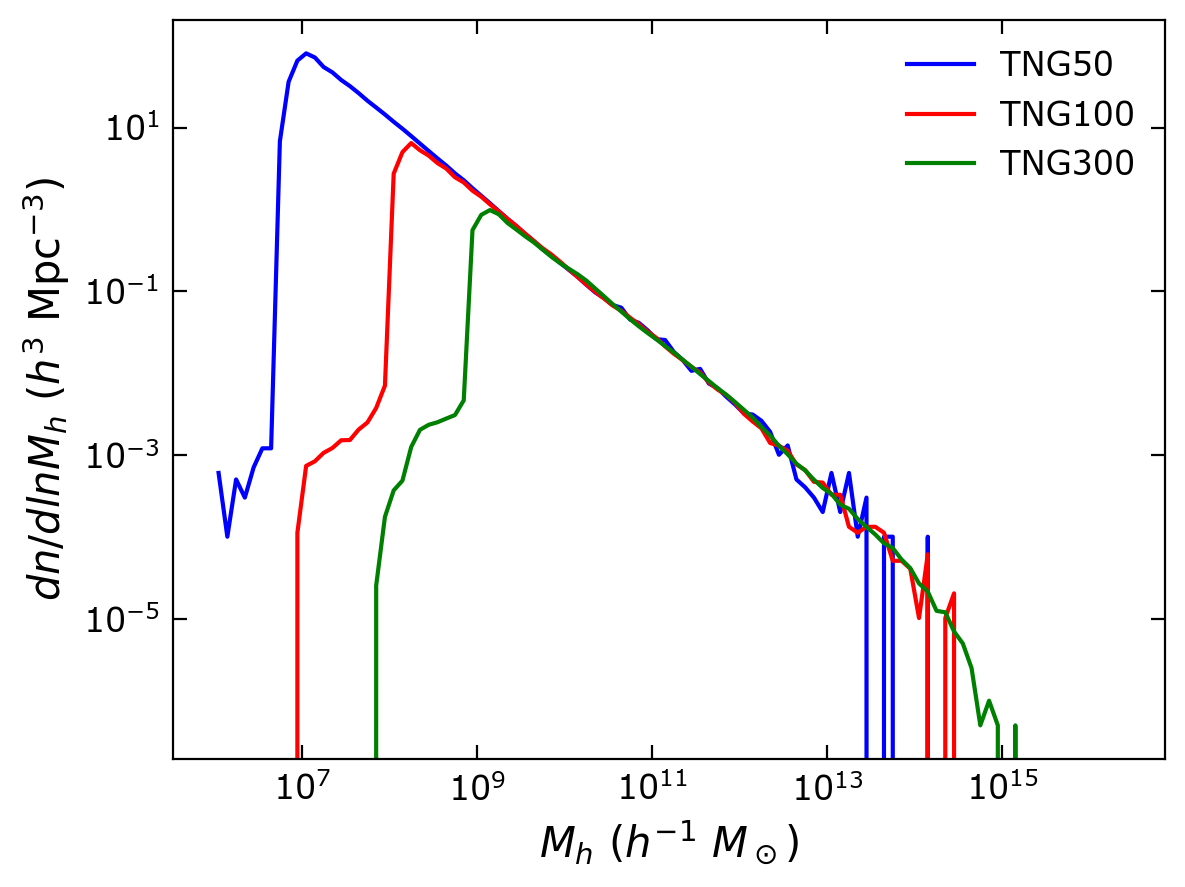

In [3]:
d = 0.1 # spacing in log10 space
h100 = 0.677
mbins = np.arange(6, 16.5, d) # mass range, from 10^6 to 10^16.5
bins = 10.**mbins # values of the bins
m = 10.**(mbins[:-1] + d/2.) # values of the bin centers to be plotted

# TNG50
dndM, bin_edges = np.histogram(mh_50, bins=bins, density=False)
# normalize the counts of halos by the volume of the simulation
Lbox = 35. # h^-1 Mpc, size of TNG50 box
dndM_50 = np.array(dndM,'float64') / Lbox**3 / d / np.log(10.)
plt.plot(m, dndM_50, 'b', label='TNG50')

# TNG100
dndM, bin_edges = np.histogram(mh_100, bins=bins, density=False)
# normalize the counts of halos by the volume of the simulation
Lbox = 75. # h^-1 Mpc, size of TNG100 box
dndM_100 = np.array(dndM,'float64') / Lbox**3 / d / np.log(10.)
plt.plot(m, dndM_100, 'r', label='TNG100')

# TNG300
dndM, bin_edges = np.histogram(mh_300, bins=bins, density=False)
# normalize the counts of halos by the volume of the simulation
Lbox = 205. # h^-1 Mpc, size of TNG300 box
dndM_300 = np.array(dndM,'float64') / Lbox**3 / d / np.log(10.)
plt.plot(m, dndM_300, 'g', label='TNG300')

plt.xlabel(r'$M_h \ (h^{-1}\ M_\odot)$')
plt.ylabel(r'$dn/dlnM_h \ (h^{3}\ \mathrm{Mpc}^{-3})$')
plt.loglog();
plt.legend(loc='upper right')

There are definitely numerical inaccuracies at the high mass end caused by the limited box size, and the resolution limits the accuracy at the low-mass end. We find that the smaller boxes provide a more realistic mass function at low mass, and the larger boxes provide a more realistic mass function at high mass. We find nearly perfect overlap in all three simulations from about $10^9$ to $10^{13}$ $M_\odot$. Next, we want to compare this to the Press-Schechter halo mass function we plotted in Homework 4.

# Press-Schechter Halo Mass Function

First, we generate the spherical collapse model. We load in our Planck 2018 cosmological parameters. We set out mass range from $10^7$ to $10^{17}$ $M_\odot$, but we only plan to plot up to $10^{15}$ $M_\odot$. We generate a larger range of masses because we found in Homework 4 that the high mass end was limited by the small range over which we were able to integrate. By extending the mass range, our results at $10^{15}\ M_\odot$ will be improved.

In [4]:
# Planck 2018 cosmological paremeters
h100 = 0.677
Om0 = 0.1424/h100**2
Ob0 = 0.0224/h100**2
ns = 0.967
sigma8 = 0.81
zeq = 3387.
keq = 0.01034/h100 # in h Mpc^-1
Tcmb0 = 2.726 # in K

In [5]:
H0 = h100 * 100 * 1e5 / 3.086e24 # 1/s
G = 6.67e-8
rho_crit = 3 * H0 * H0 / (8 * np.pi * G) # g/cm^3
rho_m = rho_crit * Om0 # g/cm^3
rho_m = rho_m / 2e33 * (3.086e24)**3 # M_sun / Mpc^3
rho_b = rho_crit * Ob0 # g/cm^3
rho_b = rho_b / 2e33 * (3.086e24)**3 # M_sun / Mpc^3

M_array = np.geomspace(1e7, 1e17, 200)
R_array = (3 * M_array / (4 * np.pi * rho_m))**(1/3)

In [6]:
from colossus.cosmology import power_spectrum
from scipy.integrate import quad
from scipy.integrate import trapz
from scipy.interpolate import interp1d

k = np.logspace(-5, 4, 901) # in comoving h/Mpc
Tk = power_spectrum.modelEisenstein98(k, h100, Om0, Ob0, Tcmb0)

def sig2( logk ):
    ak = 10.**logk
    T = Tk_int(ak)
    Pk = ak**ns * T**2
    x = ak*8.
    W2 = (3.*(np.sin(x)-x*np.cos(x))/x**3)**2
    f = W2/(2.*np.pi**2)*Pk*ak**2
    return f*ak*np.log(10.)

Tk_int = interp1d(k, Tk, kind='cubic')

s2 = quad(sig2, -5., 4.)[0]

def W(x):
    return 3*(np.sin(x) - x*np.cos(x)) / x**3

def integrand(k, R):
    Tk = power_spectrum.modelEisenstein98(k, h100, Om0, Ob0, Tcmb0)
    Pk = k**ns * Tk**2 * sigma8**2/s2
    return 1/(2*np.pi**2) * W(k*R)**2 * Pk * k**2

sig_array = np.zeros(len(R_array))
for i, r in enumerate(R_array):
    integral = quad(integrand, 0, np.inf, args=(r))[0]
    sig_array[i] = np.sqrt(integral)

/var/folders/2n/1mpvqxvj4nz5s3s80qwjttr40000gs/T/ipykernel_25807/3973462599.py:32: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = quad(integrand, 0, np.inf, args=(r))[0]
/var/folders/2n/1mpvqxvj4nz5s3s80qwjttr40000gs/T/ipykernel_25807/3973462599.py:32: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = quad(integrand, 0, np.inf, args=(r))[0]


In [7]:
sig_M_interp = interp1d(np.log(M_array), np.log(sig_array), kind='linear')
dlnsig_dlnM = np.gradient(sig_M_interp(np.log(M_array)), np.log(M_array))

dlnsig_dlnM_interp = interp1d(np.log(M_array), dlnsig_dlnM, kind='linear')

def dn_dM(M):
    sigma = np.exp(sig_M_interp(np.log(M)))
    return -np.sqrt(2/np.pi) * rho_m / M**2 * 1.69 / sigma * dlnsig_dlnM_interp(np.log(M)) * np.exp(-0.5*1.69**2 / sigma**2)

n_array = np.zeros(len(M_array))
for i, m in enumerate(M_array):
    # if m < 10**10:
    #     n_array[i] = quad(dn_dM, m, 10**17)[0]
    # else:
    n_array[i] = quad(dn_dM, m, 10**17)[0]

dn_dlnM = M_array*dn_dM(M_array)

/var/folders/2n/1mpvqxvj4nz5s3s80qwjttr40000gs/T/ipykernel_25807/2758779676.py:15: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  n_array[i] = quad(dn_dM, m, 10**17)[0]
/var/folders/2n/1mpvqxvj4nz5s3s80qwjttr40000gs/T/ipykernel_25807/2758779676.py:15: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  n_array[i] = quad(dn_dM, m, 10**17)[0]


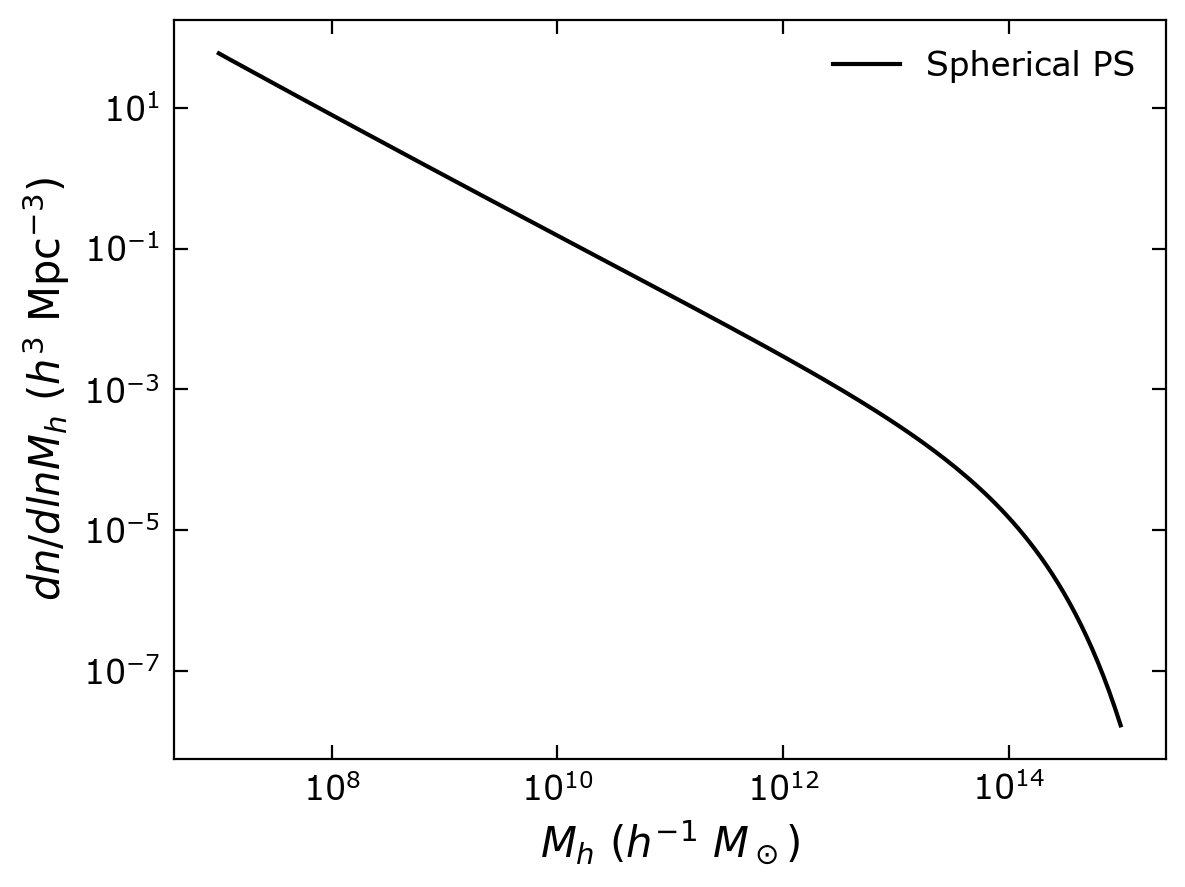

In [8]:
plt.xscale('log')
plt.xlabel(r'$M_h \ (h^{-1}\ M_\odot)$')
plt.ylabel(r'$dn/dlnM_h \ (h^{3}\ \mathrm{Mpc}^{-3})$')
plt.yscale('log')
plt.plot(M_array[M_array < 10**15], dn_dlnM[M_array < 10**15], c='k', label=r'Spherical PS')
plt.legend()

In [9]:
def el_dn_dM(M):
    sigma = np.exp(sig_M_interp(np.log(M)))
    A = 0.322
    nu_fac = 0.84
    q = 0.3
    return -A * (1 + 1/(nu_fac * 1.69 / sigma)**(2*q)) * np.sqrt(2/np.pi) * rho_m / M**2 * nu_fac * 1.69 / sigma * dlnsig_dlnM_interp(np.log(M)) * np.exp(-0.5*(nu_fac*1.69/sigma)**2)

el_n_array = np.zeros(len(M_array))
for i, m in enumerate(M_array):
    # if m < 10**10:
    #     el_n_array[i] = quad(el_dn_dM, m, 10**14.4)[0]
    # else:
    el_n_array[i] = quad(el_dn_dM, m, 10**17)[0]

el_dn_dlnM = M_array*el_dn_dM(M_array)

/var/folders/2n/1mpvqxvj4nz5s3s80qwjttr40000gs/T/ipykernel_25807/4260443349.py:13: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  el_n_array[i] = quad(el_dn_dM, m, 10**17)[0]
/var/folders/2n/1mpvqxvj4nz5s3s80qwjttr40000gs/T/ipykernel_25807/4260443349.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  el_n_array[i] = quad(el_dn_dM, m, 10**17)[0]


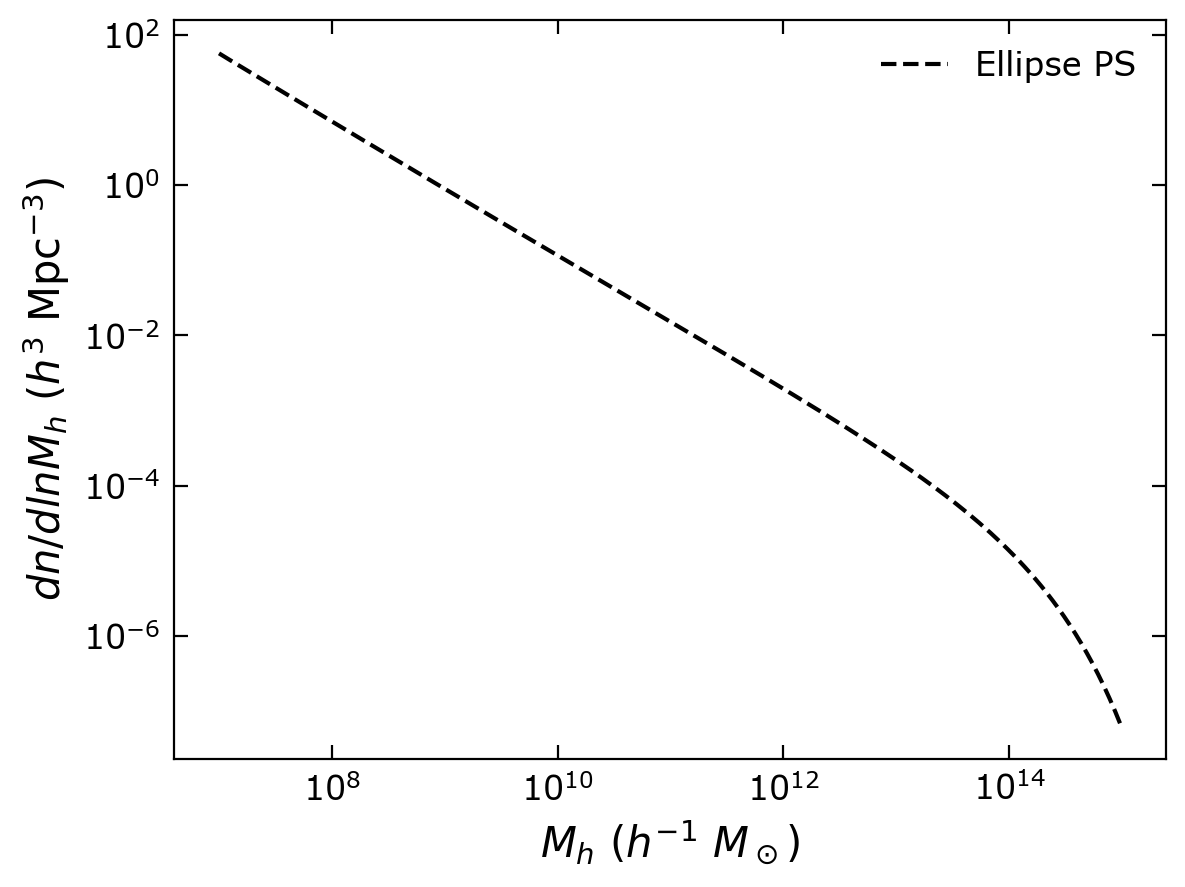

In [10]:
plt.xscale('log')
plt.xlabel(r'$M_h \ (h^{-1}\ M_\odot)$')
plt.ylabel(r'$dn/dlnM_h \ (h^{3}\ \mathrm{Mpc}^{-3})$')
plt.yscale('log')
# plt.plot(M_array[M_array < 10**15], M_array[M_array < 10**15]*dn_dM(M_array[M_array < 10**15]), c='k', label=r'PS')
plt.plot(M_array[M_array < 10**15], el_dn_dlnM[M_array < 10**15], c='k', linestyle='--', label=r'Ellipse PS')
plt.legend()

We plot both the spherical collapse model and the ellipsoidal collapse model. As before, we find that they are only slightly different, but we will be using the ellipsoidal collapse model for our comparison because it is more physically motivated.

# Halo Mass Function Comparison

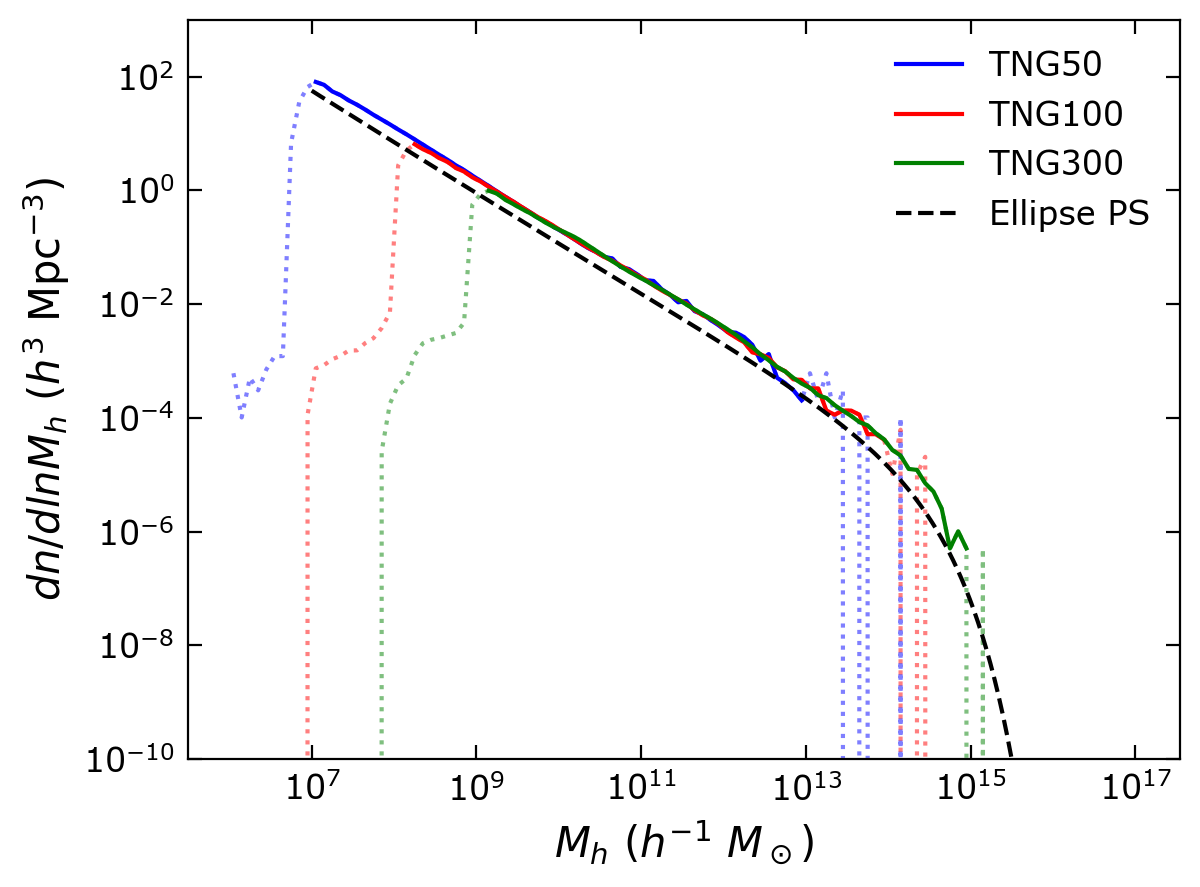

In [11]:
plt.xscale('log')
plt.xlabel(r'$M_h \ (h^{-1}\ M_\odot)$')
plt.ylabel(r'$dn/dlnM_h \ (h^{3}\ \mathrm{Mpc}^{-3})$')
plt.yscale('log')
plt.ylim(1e-10, 1e3)
# plt.xlim(1e9, 1e16)

d = 0.1
mbins = np.arange(6, 16.5, d)
bins = 10.**mbins
m = 10.**(mbins[:-1] + d/2.)

plt.plot(m, dndM_50, 'b', linestyle=':', alpha=0.5)
plt.plot(m, dndM_100, 'r', linestyle=':', alpha=0.5)
plt.plot(m, dndM_300, 'g', linestyle=':', alpha=0.5)

plt.plot(m[(m > 1e7) & (m < 1e13)], dndM_50[(m > 1e7) & (m < 1e13)], 'b', label='TNG50')
plt.plot(m[(m > 1.5e8) & (m < 1e14)], dndM_100[(m > 1.5e8) & (m < 1e14)], 'r', label='TNG100')
plt.plot(m[(m > 1.2e9) & (m < 1e15)], dndM_300[(m > 1.2e9) & (m < 1e15)], 'g', label='TNG300')

# plt.plot(M_array, dn_dlnM, c='k', label=r'Spherical PS')
plt.plot(M_array, el_dn_dlnM, c='k', linestyle='--', label=r'Ellipse PS')

plt.legend()

We find that our ellipsoidal Press-Schechter Halo Mass Function differs from TNG by a factor of about 1.7, which is suspiciously close to the critical density. I have tried a number of avenues to find where this discrepancy comes from, and nothing seems to explain it. I double checked every equation to see if I missed a factor of $\delta_c$. I have checked every logarithm to make sure I am using the natural log when I mean to, and the base-10 log when I mean to. I checked the window function, because 1.7 is also close to $\sqrt{3}$, and there is a factor of 3 in the window function. I have compared my Press-Schechter result with other students, and found that I have the same factor of 1.7 discrepancy with one student, but I match exactly with another. I have explored nearly every possibility I can, and I still am not sure if it is a numerical mistake or a true inconsistency between the Press-Schechter formalism and TNG. The only clear conclusion I have come to is that it would be a better use of my time to study for the prelim and work on my paper than to track down this missing factor.

# Stellar Mass Function Comparison

We now plot and compare the stellar mass function with the [Bell et al. 2003](https://ui.adsabs.harvard.edu/abs/2003ApJS..149..289B/abstract) function we used in Homework 4. To begin, we plot the stellar mass functions from each TNG simulation here.

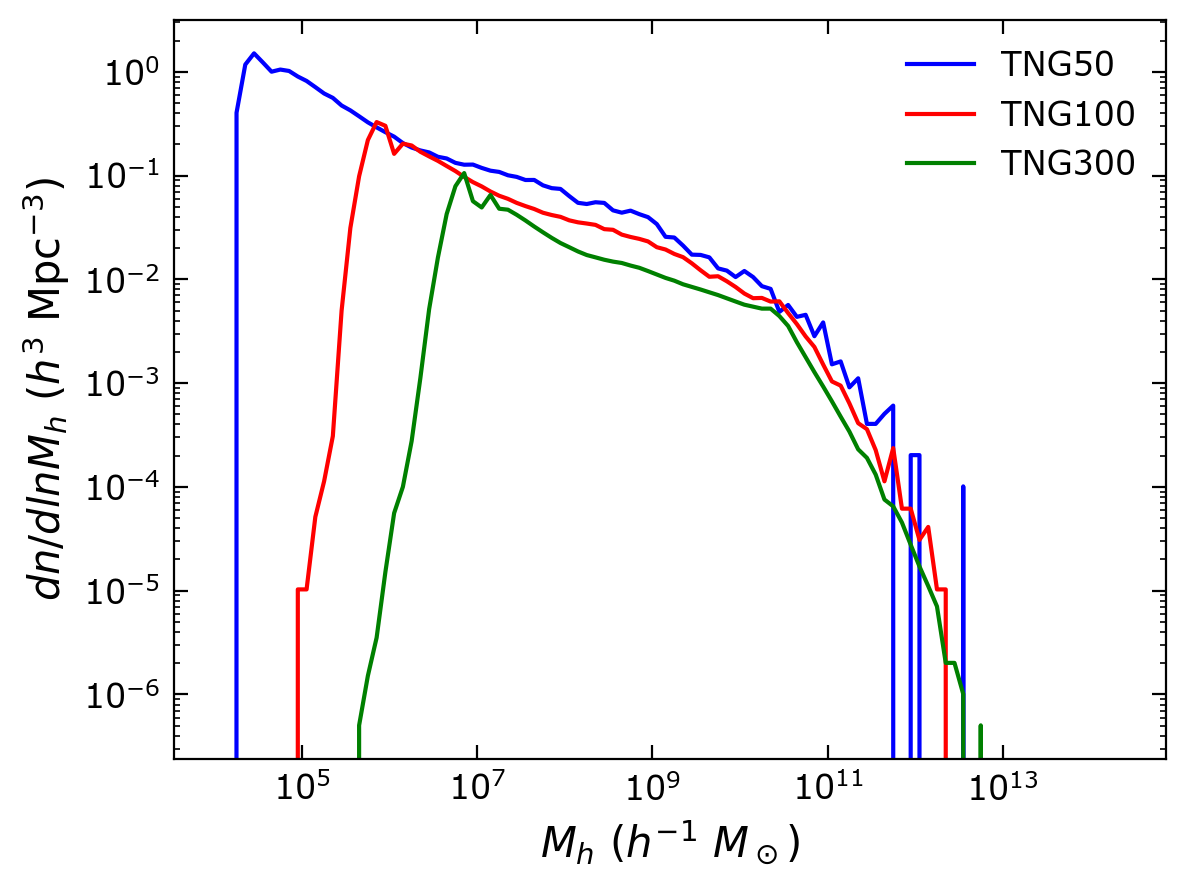

In [12]:
d = 0.1 # spacing in log10 space
mbins = np.arange(4, 14.5, d) # mass range, from 10^6 to 10^16.5
bins = 10.**mbins # values of the bins
m = 10.**(mbins[:-1] + d/2.) # values of the bin centers to be plotted

# TNG50
dndM, bin_edges = np.histogram(ms_50, bins=bins, density=False)
# normalize the counts of halos by the volume of the simulation
Lbox = 35. # h^-1 Mpc, size of TNG50 box
dndMs_50 = np.array(dndM,'float64') / Lbox**3 / d / np.log(10.)
plt.plot(m, dndMs_50, 'b', label='TNG50')

# TNG100
dndM, bin_edges = np.histogram(ms_100, bins=bins, density=False)
# normalize the counts of halos by the volume of the simulation
Lbox = 75. # h^-1 Mpc, size of TNG100 box
dndMs_100 = np.array(dndM,'float64') / Lbox**3 / d / np.log(10.)
plt.plot(m, dndMs_100, 'r', label='TNG100')

# TNG300
dndM, bin_edges = np.histogram(ms_300, bins=bins, density=False)
# normalize the counts of halos by the volume of the simulation
Lbox = 205. # h^-1 Mpc, size of TNG300 box
dndMs_300 = np.array(dndM,'float64') / Lbox**3 / d / np.log(10.)
plt.plot(m, dndMs_300, 'g', label='TNG300')

plt.xlabel(r'$M_h \ (h^{-1}\ M_\odot)$')
plt.ylabel(r'$dn/dlnM_h \ (h^{3}\ \mathrm{Mpc}^{-3})$')
plt.loglog();
plt.legend(loc='upper right')

We find, as with the halo mass function, that there are inconsistencies and inaccuracies at the high and low mass range, due to the limited box size and precision scale of the simulation respectively. This is to be expected, but what is somewhat surprising is that the functions do not line up exactly in the middle. However, they produce roughly the same shape, so we believe this is due to random differences in the simulation.

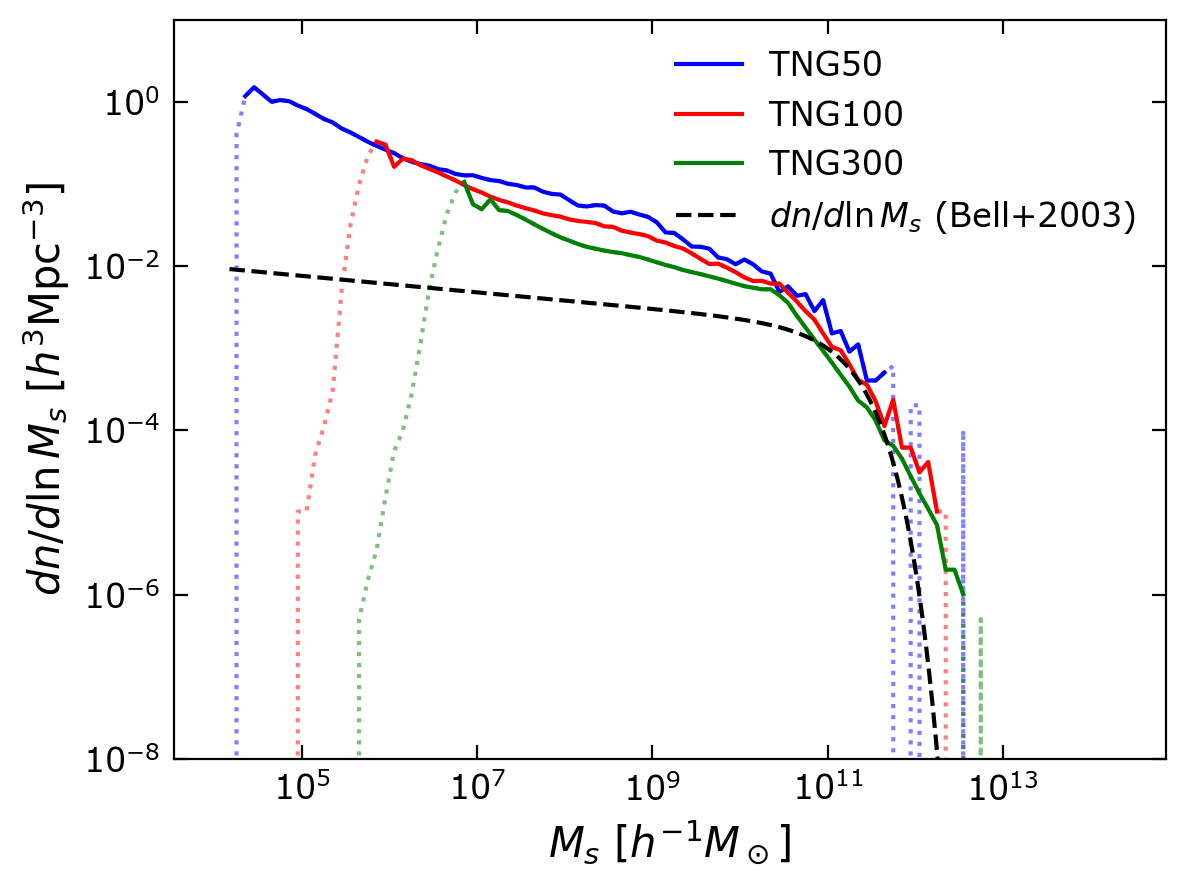

In [13]:
def Bell_smf(Ms):
    phi_0 = 4e-3*h100**3 # Mpc^-3
    alpha = 1.1
    M_0 = 7e10 / h100# M_sun
    return phi_0 * (Ms/M_0)**-alpha * np.exp(-Ms/M_0) / M_0

Ms_array = np.geomspace(1e4, 1e13, 1000)

plt.plot(m, dndMs_50, 'b', linestyle=':', alpha=0.5)
plt.plot(m, dndMs_100, 'r', linestyle=':', alpha=0.5)
plt.plot(m, dndMs_300, 'g', linestyle=':', alpha=0.5)

plt.plot(m[(m>2e4) & (m < 5e11)], dndMs_50[(m>2e4) & (m < 5e11)], 'b', label='TNG50')
plt.plot(m[(m>7e5) & (m < 2e12)], dndMs_100[(m>7e5) & (m < 2e12)], 'r', label='TNG100')
plt.plot(m[(m>6e6) & (m < 4e12)], dndMs_300[(m>6e6) & (m < 4e12)], 'g', label='TNG300')

plt.plot(Ms_array/h100, Ms_array/h100*Bell_smf(Ms_array), c='k', ls='--', label=r'$dn/d\ln M_s$ (Bell+2003)')

plt.xlabel(r'$M_s\ [h^{-1}M_\odot]$')
plt.ylabel(r'$dn/d\ln M_s\ [h^3\mathrm{Mpc}^{-3}]$')
plt.ylim(1e-8, 10)
plt.loglog()
plt.legend(loc='upper right')

We compare the stellar mass function with the ([Bell et al. 2003](https://ui.adsabs.harvard.edu/abs/2003ApJS..149..289B/abstract)) function we used in Homework 4, dotting out the numerical inaccuracies at high and low masses. We find that TNG overestimates the number density of stars at both high and low masses, especially at low masses, and only agrees with Bell+2003 at around a stellar mass of $10^{11}\ M_\odot$. This is somewhat surprising, as we had much better agreement with the halo mass function. We believe this could be due to feedback processes not being perfectly modeled in the TNG simulation, leading to great overestimates on the low mass side.